In [1]:
from cProfile import label

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from keras.src.legacy_tf_layers.core import dense

from Deeplearning.new_1 import history

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
# A simple linear classifier (single-layer neural network). Good for binary classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score: Measures how many predictions are correct.
# classification_report: Shows precision, recall, and F1-score for each class.
# confusion_matrix: Shows where the model is making correct vs wrong predictions.

# -------------------------------
# TensorFlow / Keras (Deep Learning utilities)
# -------------------------------

from tensorflow.keras.models import Sequential
# Lets you build a neural network layer-by-layer in a linear fashion.

from tensorflow.keras.layers import Dense
# Fully connected layer (every neuron connects to every neuron in the next layer).

from tensorflow.keras.layers import Dropout
# Randomly drops some neurons during training to prevent overfitting.

from tensorflow.keras.utils import to_categorical
# 👉 Converts class labels (like 0, 1, 2) into one-hot encoded format (e.g., [1,0,0], [0,1,0]).

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


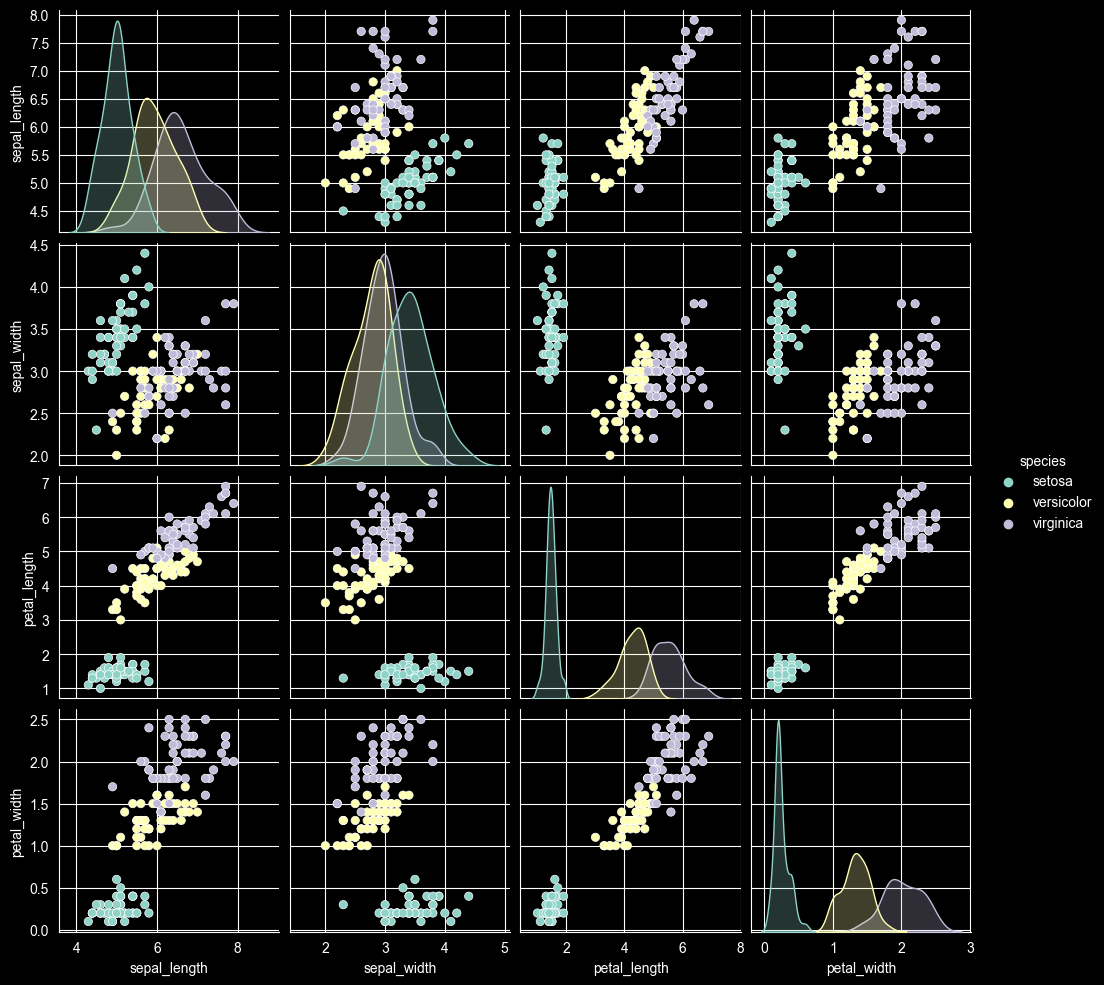

In [7]:
sns.pairplot(df, hue='species')

In [8]:
X = df.drop(columns=['species'], axis=1)
y = df['species']

In [9]:
enocder = LabelEncoder()

In [10]:
y_int = enocder.fit_transform(y)

In [11]:
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_int, test_size=0.2, random_state=42, stratify=y_int)


In [14]:
scaler  = StandardScaler()

In [16]:
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


## Used simple Perceptron neural network

In [19]:
per = Perceptron(max_iter=1000, random_state=42)

In [20]:
per.fit(X_trained_scaled, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [25]:
y_pred_per = per.predict(X_test_scaled)

In [26]:
accuracy_score(y_test, y_pred_per)

0.9

In [27]:
print(classification_report(y_test, y_pred_per))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [28]:
y_train_cat = to_categorical(y_train, num_classes=3)

In [30]:
y_train_cat

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [31]:
y_test_cat = to_categorical(y_test, num_classes=3)

In [34]:
model = Sequential([
    Dense(16,input_dim=4,activation='relu'),
    Dense(8,activation='relu'),
    Dense(3,activation='softmax')
])

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_trained_scaled, y_train_cat,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 1.2018 - accuracy: 0.0729 - val_loss: 1.1165 - val_accuracy: 0.1250
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1234 - accuracy: 0.1042 - val_loss: 1.0508 - val_accuracy: 0.1667
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0501 - accuracy: 0.1771 - val_loss: 0.9885 - val_accuracy: 0.2083
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9855 - accuracy: 0.2708 - val_loss: 0.9299 - val_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9239 - accuracy: 0.3438 - val_loss: 0.8786 - val_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.4375 - val_loss: 0.8318 - val_accuracy: 0.4583
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8121 - accuracy: 0.5833 - val_loss: 0.7975 - val_accuracy: 0.5833
Epoch 8/100


In [37]:
loss, acc = model.evaluate(X_test_scaled, y_test_cat,verbose=1)
print(acc)

1/1 [==============================] - 0s 106ms/step - loss: 0.1405 - accuracy: 0.9667
0.9666666388511658


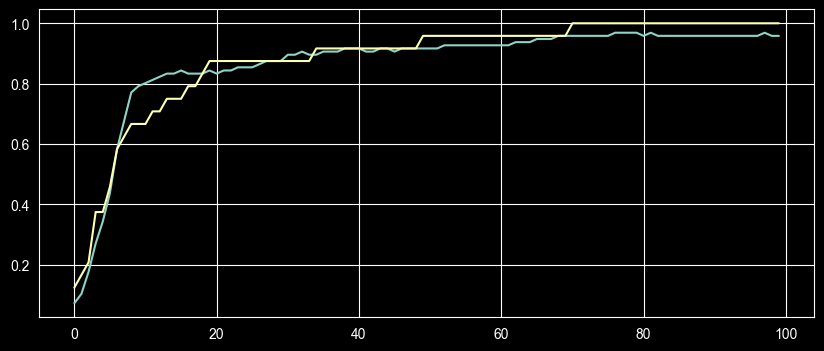

In [41]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='train')